In [205]:
#! pip install plotly
#! pip install iso3166

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = 'browser'
#import plotly.express as px
from iso3166 import countries

In [207]:
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df['codes'] = 0


In [208]:
df.loc[df['Country'] == 'Åland', 'Country'] = 'Åland Islands'
df.loc[df['Country'] == 'Antigua And Barbuda', 'Country'] = 'Antigua and Barbuda'
df.loc[df['Country'] == 'Bolivia', 'Country'] = 'Bolivia, Plurinational State of'
df.loc[df['Country'] == 'United States', 'Country'] = 'United States of America'
df.loc[df['Country'] == 'United Kingdom', 'Country'] = 'United Kingdom of Great Britain and Northern Ireland'
df.loc[df['Country'] == 'Russia', 'Country'] = 'Russian Federation'
df.loc[df['Country'] == 'Turkey', 'Country'] = 'Türkiye'
df.loc[df['Country'] == 'Bosnia And Herzegovina', 'Country'] = 'Bosnia and Herzegovina'
df.loc[df['Country'] == 'Congo (Democratic Republic Of The)', 'Country'] = 'Congo, Democratic Republic of the'
df.loc[df['Country'] == "Côte D'Ivoire", 'Country'] = "Côte d'Ivoire"
df.loc[df['Country'] == 'Czech Republic', 'Country'] = 'Czechia'
df.loc[df['Country'] == 'Guinea Bissau', 'Country'] = 'Guinea-Bissau'
df.loc[df['Country'] == 'Iran', 'Country'] = 'Iran, Islamic Republic of'
df.loc[df['Country'] == 'North Korea', 'Country'] = "Korea, Democratic People's Republic of"
df.loc[df['Country'] == 'South Korea', 'Country'] = 'Korea, Republic of'
df.loc[df['Country'] == 'Laos', 'Country'] = "Lao People's Democratic Republic"
df.loc[df['Country'] == "Macedonia", 'Country'] = "North Macedonia"
df.loc[df['Country'] == "Moldova", 'Country'] = "Moldova, Republic of"
df.loc[df['Country'] == "Burma", 'Country'] = "Myanmar"
df.loc[df['Country'] == "Syria", 'Country'] = "Syrian Arab Republic"
df.loc[df['Country'] == "Tanzania", 'Country'] = "Tanzania, United Republic of"
df.loc[df['Country'] == "Taiwan", 'Country'] = "Taiwan, Province of China"
df.loc[df['Country'] == "Vietnam", 'Country'] = "Viet Nam"
df.loc[df['Country'] == "Venezuela", 'Country'] = "Venezuela, Bolivarian Republic of"
df.loc[df['Country'] == "Denmark", 'Country'] = "get rid of me please" 
df.loc[df['Country'] == "Denmark (Europe)", 'Country'] = "Denmark"


In [209]:
country_unique = df['Country'].unique()

In [210]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,codes
0,1743-11-01,4.384,2.294,Åland Islands,0
1,1743-12-01,NaN,NaN,Åland Islands,0
2,1744-01-01,NaN,NaN,Åland Islands,0
3,1744-02-01,NaN,NaN,Åland Islands,0
4,1744-03-01,NaN,NaN,Åland Islands,0


In [211]:
for c in countries:
    condition = (df['Country'] == c.name)
    df.loc[condition, 'codes'] = c.alpha3
df.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,codes
577457,2013-05-01,19.059,1.022,Zimbabwe,ZWE
577458,2013-06-01,17.613,0.473,Zimbabwe,ZWE
577459,2013-07-01,17.000,0.453,Zimbabwe,ZWE
577460,2013-08-01,19.759,0.717,Zimbabwe,ZWE
577461,2013-09-01,NaN,NaN,Zimbabwe,ZWE


In [212]:
condition = (df['codes'] == 0)
df = df[~condition]
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,codes
0,1743-11-01,4.384,2.294,Åland Islands,ALA
1,1743-12-01,NaN,NaN,Åland Islands,ALA
2,1744-01-01,NaN,NaN,Åland Islands,ALA
3,1744-02-01,NaN,NaN,Åland Islands,ALA
4,1744-03-01,NaN,NaN,Åland Islands,ALA


In [213]:
df.dropna(inplace=True)
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,codes
0,1743-11-01,4.384,2.294,Åland Islands,ALA
5,1744-04-01,1.530,4.680,Åland Islands,ALA
6,1744-05-01,6.702,1.789,Åland Islands,ALA
7,1744-06-01,11.609,1.577,Åland Islands,ALA
8,1744-07-01,15.342,1.410,Åland Islands,ALA


In [214]:
average_temp = df.groupby('Country')['AverageTemperature'].mean().reset_index()
for c in countries:
    condition = (average_temp['Country'] == c.name)
    average_temp.loc[condition, 'codes'] = c.alpha3

In [215]:
import plotly.graph_objects as go
colorscale = ["#00ccff", "#00ff08", "#fac505", "#fa0505"]
def ploter(df, colorbar_title, title_text):
    fig = go.Figure(data=go.Choropleth(
        locations = df['codes'],
        z = df['AverageTemperature'],
        text = df['Country'],
        colorscale = colorscale,
        autocolorscale=False,
        reversescale=False,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_ticksuffix = '°C',
        colorbar_title = colorbar_title
    ))

    fig.update_layout(
        title_text=title_text,
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='equirectangular'
        ),
        annotations = [dict(
            x=0.55,
            y=0.1,
            xref='paper',
            yref='paper',
            showarrow = True
        )]

    )

    fig.show()

In [216]:
ploter(average_temp,"Average temperature","Average temperatures on Earth since the 18th or 19th century")

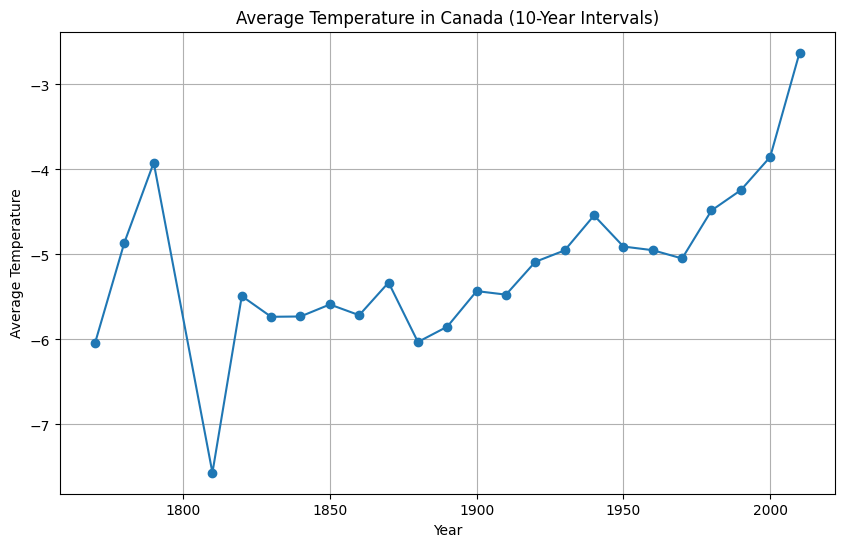

In [217]:
import warnings
warnings.filterwarnings("ignore")
chosen_country = 'Canada'

country_data = df[df['Country'] == chosen_country]
country_data['dt'] = pd.to_datetime(country_data['dt'])
country_data['decade'] = country_data['dt'].dt.year//10*10

grouped_data = country_data.groupby('decade')['AverageTemperature'].mean()
grouped_data = grouped_data.iloc[1:]
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-')
plt.title(f'Average Temperature in {chosen_country} (10-Year Intervals)')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.show()

In [218]:

differences = []
differences_1900 = []
for country in df["Country"].unique():
    country_data = df[df['Country'] == country]
    country_data['dt'] = pd.to_datetime(country_data['dt'])
    country_data['decade'] = country_data['dt'].dt.year // 10 * 10
    country_data_1900 = country_data[country_data['decade'] >= 1900]
    grouped_data = country_data.groupby('decade')['AverageTemperature'].mean()
    grouped_data_1900 = country_data_1900.groupby('decade')['AverageTemperature'].mean()
    #grouped_data = grouped_data.iloc[1:]
    
    difference = grouped_data.iloc[-1] - grouped_data.iloc[0]
    difference_1900 = grouped_data_1900.iloc[-1] - grouped_data_1900.iloc[0]

    country_code = df[df['Country'] == country]['codes'].iloc[0]
    differences.append({'Country': country, 'codes': country_code, 'AverageTemperature': difference})
    differences_1900.append({'Country': country, 'codes': country_code, 'AverageTemperature': difference_1900})

diff_df = pd.DataFrame(differences)
diff_df_1900 = pd.DataFrame(differences_1900)



In [219]:
ploter(diff_df, "Average temperature change","Average temperature change since the 18th century, or later")


In [220]:
ploter(diff_df_1900, "Average temperature change","Average temperature change since the year 1900")

In [221]:
df['dt'] = pd.to_datetime(df['dt'])
df['decade'] = df['dt'].dt.year // 10 * 10


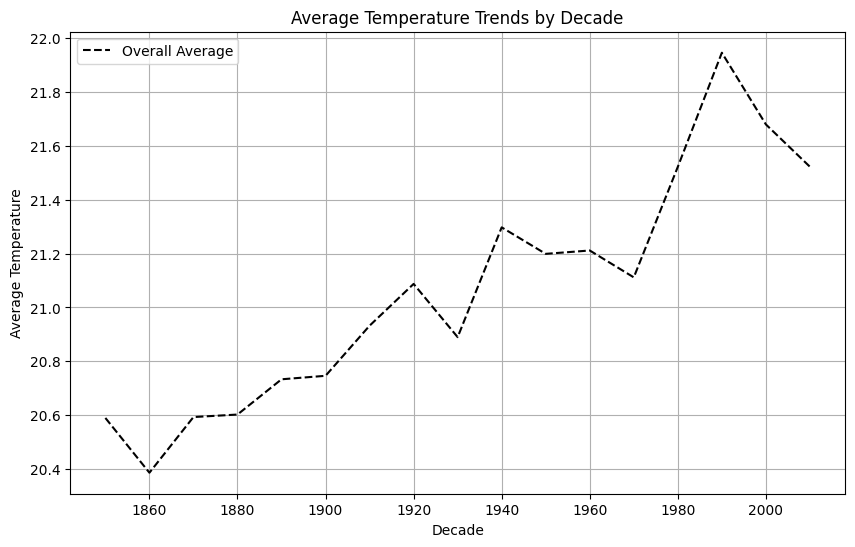

In [222]:

overall_avg_temp = country_data.groupby('decade')['AverageTemperature'].mean()
plt.figure(figsize=(10, 6))
plt.plot(overall_avg_temp.index, overall_avg_temp, label='Overall Average', color='black', linestyle='--')
plt.title('Average Temperature Trends by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [223]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,codes,decade
0,1743-11-01,4.384,2.294,Åland Islands,ALA,1740
5,1744-04-01,1.530,4.680,Åland Islands,ALA,1740
6,1744-05-01,6.702,1.789,Åland Islands,ALA,1740
7,1744-06-01,11.609,1.577,Åland Islands,ALA,1740
8,1744-07-01,15.342,1.410,Åland Islands,ALA,1740


In [224]:
def plot_choropleth_with_slider(df):
    decade_avg_temp = df.groupby(['decade', 'Country', 'codes'])['AverageTemperature'].mean().reset_index()
    decade_avg_temp.loc[decade_avg_temp['Country'] == 'Türkiye', 'Country'] = 'Turkey'
    fig = go.Figure()
    for decade in decade_avg_temp['decade'].unique():
        decade_data = decade_avg_temp[decade_avg_temp['decade'] == decade]
        fig.add_trace(go.Choropleth(
            locations=decade_data['Country'],
            z=decade_data['AverageTemperature'],
            locationmode='country names',
            colorscale=colorscale,
            colorbar_title='Average Temperature',
            visible=False, 
            name=str(decade)  
        ))
    fig.data[0].visible = True
    
    steps = []
    for i, decade in enumerate(decade_avg_temp['decade'].unique()):
        step = dict(
            label=f"Decade {decade}",
            method='update',
            args=[{'visible': [False] * len(fig.data)},  
                  {'title': f'Average Temperatures by Country ({decade}s)'}],  
        )
        step['args'][0]['visible'][i] = True  
        steps.append(step)

    fig.update_layout(
        title='Average Temperatures by Country',
        geo=dict(
            showframe=False,
            projection_type='equirectangular'
        ),
        updatemenus=[{
            'buttons': steps,
            'direction': 'down',
            'showactive': True,
            'x': 0.5,
            'y': 1.2
        }]
    )
    print(decade_avg_temp[decade_avg_temp["Country"]=="Türkiye"])
    fig.show()
plot_choropleth_with_slider(df)

Empty DataFrame
Columns: [decade, Country, codes, AverageTemperature]
Index: []


In [225]:
median = diff_df_1900['AverageTemperature'].median()
q1 = diff_df_1900['AverageTemperature'].quantile(0.25)
q2 = diff_df_1900['AverageTemperature'].quantile(0.5)
q3 = diff_df_1900['AverageTemperature'].quantile(0.75)
q1,q2,q3
def categorize1(value):
    if value <= q1:
        return 0
    elif q1 < value <= q2:
        return 1
    elif q2 < value <= q3:
        return 2
    return 3
def categorize2(value):
    if value < median:
        return 0
    return 1
# Apply categorization to create a new column

diff_df_1900['Quartile'] = diff_df_1900['AverageTemperature'].apply(categorize1)
diff_df_1900['IsGreaterThanMedian'] = diff_df_1900['AverageTemperature'].apply(categorize2)

In [226]:
diff_df_1900.head()

,Country,codes,AverageTemperature,Quartile,IsGreaterThanMedian
0,Åland Islands,ALA,1.065714,1,0
1,Afghanistan,AFG,1.785786,3,1
2,Albania,ALB,1.459576,2,1
3,Algeria,DZA,1.914388,3,1
4,American Samoa,ASM,1.101669,1,0


In [227]:
colorscale2 = ["#c3ff00", "#fffb00", "#ff6600", "#fa0505"]
fig = go.Figure(data=go.Choropleth(
    locations = diff_df_1900['codes'],
    z = diff_df_1900['IsGreaterThanMedian'],
    text = diff_df_1900['Country'],
    colorscale = colorscale2,
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Is the change bigger than median?',
))

fig.update_layout(
    title_text='Is the change in average temperature since 1900 bigger or smaller than median? (YES - 1, NO - 0)',
    geo=dict(
        showframe=True,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        showarrow = True
    )]
)

fig.show()

In [228]:

fig = go.Figure(data=go.Choropleth(
    locations = diff_df_1900['codes'],
    z = diff_df_1900['Quartile'],
    text = diff_df_1900['Country'],
    colorscale = colorscale2,
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'How quickly does the temperature change?',
))

fig.update_layout(
    title_text='How quickly does the temperature change?',
    geo=dict(
        showframe=True,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        showarrow = True
    )]
)

fig.show()